In [9]:
%matplotlib inline

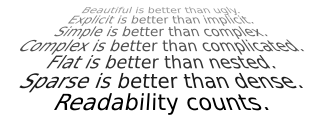

In [13]:
# ----------------------------------------------------------------------------
# Title:   Scientific Visualisation - Python & Matplotlib
# Author:  Nicolas P. Rougier
# License: BSD
# ----------------------------------------------------------------------------
# Comment: Nicolas P. Rougier & Jehyun Lee
# kr & en: https://jehyunlee.github.io/2021/12/28/Python-DS-94-rougier02/
# ----------------------------------------------------------------------------
# Illustrate the use of TextPath and access to raw vertices
# ----------------------------------------------------------------------------
import matplotlib.pyplot as plt
from matplotlib.textpath import TextPath
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import numpy as np

fig = plt.figure(figsize=(4.25, 2))
ax = fig.add_axes([0, 0, 1, 1], aspect=1, xlim=[-40, 40], ylim=[-1, 25])
ax.axis("off")

text = [
    "Beautiful is better than ugly.",
    "Explicit is better than implicit.",
    "Simple is better than complex.",
    "Complex is better than complicated.",
    "Flat is better than nested.",
    "Sparse is better than dense.",
    "Readability counts.",
]

y = 0
size = 6
xfactor = 1 / 50
yfactor = 1 / 120

for i, line in enumerate(text[::-1]):
    path = TextPath((0, 0), line, size=size)
    V = path.vertices
    codes = path.codes
    xmin, xmax = V[:, 0].min(), V[:, 0].max()
    ymin, ymax = V[:, 1].min(), V[:, 1].max()

    # New Path
    # X centering
    Px = V[:, 0] - (xmax + xmin) / 2

    # Moving whole text at y coordinates
    Py = V[:, 1] + y

    # Rescaling along y
    Py *= 1 - (Py * yfactor)

    # Rescaling along x
    Px *= 1 - (Py * xfactor)

    # Update interlines
    y += size * (1 - ymin * yfactor)

    # new path
    path_new = Path(np.array([Px, Py]).T, codes=codes)
    
    # Display
    patch = PathPatch(path_new, facecolor="%.2f" % (i / 10), linewidth=0, clip_on=False)
    ax.add_artist(patch)

# plt.savefig("text-starwars.pdf")
plt.savefig("text-starwars_org.png")